In [1]:
import pandas as pd  
import numpy as np
import sys,glob,os,time
import vaex
import math

from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sea 



%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.use_jedi = False

sea.set(font_scale=3,palette=sea.color_palette('colorblind'), 
        rc={'axes.facecolor':'white'},color_codes=False)
sea.set_style(style="ticks",rc={"xtick.direction": "in","ytick.direction": "in",
                                "xtick.minor.size": 4, "ytick.minor.size": 4})
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


pi = math.pi

In [2]:
rng = np.random.RandomState(33)

white_noise = rng.normal(size=(5,10_000))

brownian_motion = np.cumsum(white_noise, axis=1)

Text(0.5, 0, 'steps')

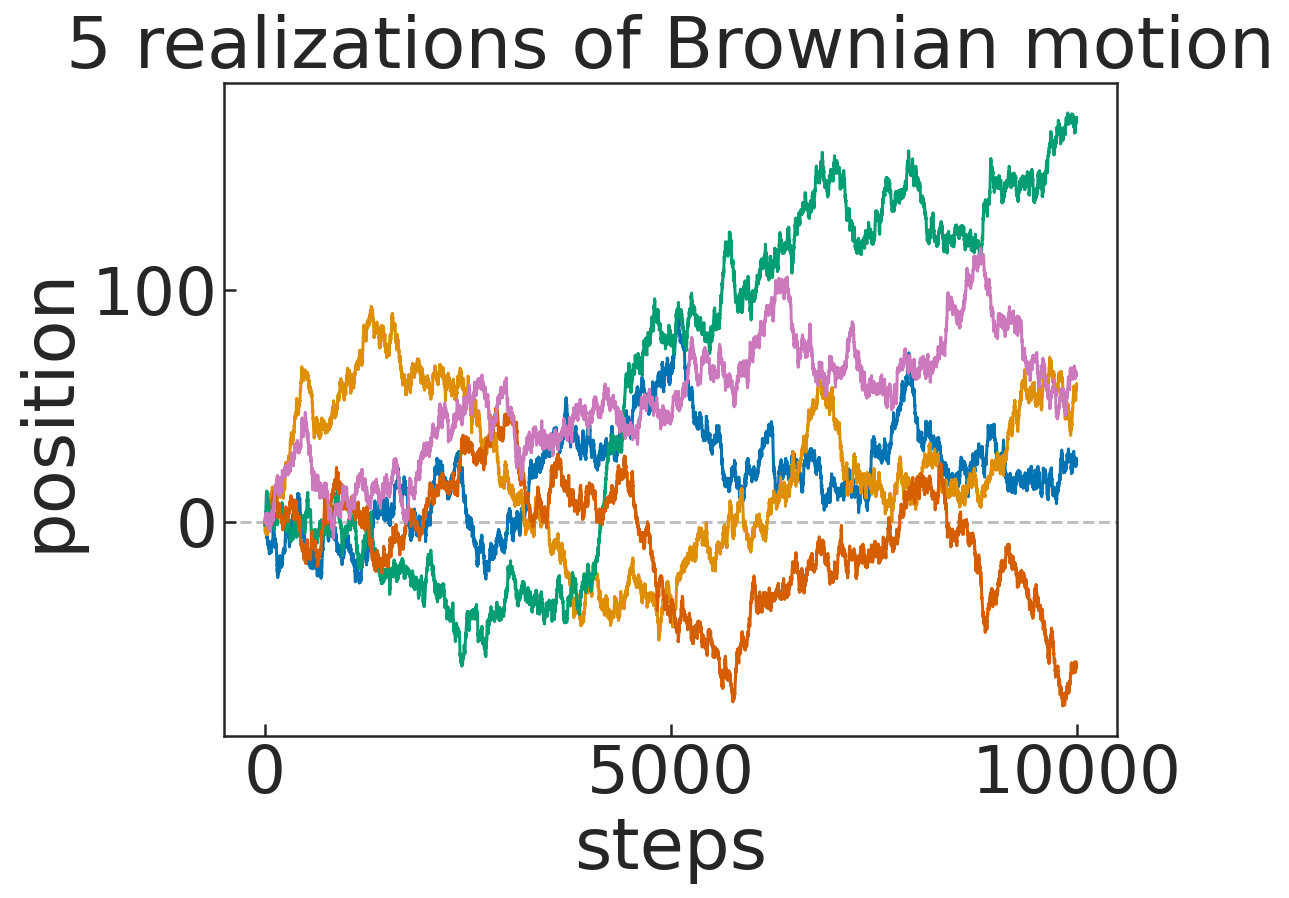

In [3]:
fig, axes = plt.subplots(figsize=(8,6))
lines = [plt.plot(bm) for bm in brownian_motion]

plt.axhline(0, ls='--', c='silver', zorder=0)

plt.title('5 realizations of Brownian motion')
plt.ylabel('position')
plt.xlabel('steps')

In [4]:
rng = np.random.RandomState(33)

white_noise = rng.normal(size=(1000,10_000))
brownian_motion = np.cumsum(white_noise, axis=1)

In [5]:
steps = np.ones_like(white_noise) * np.arange(white_noise.shape[1])

Text(0.5, 0, 'steps')

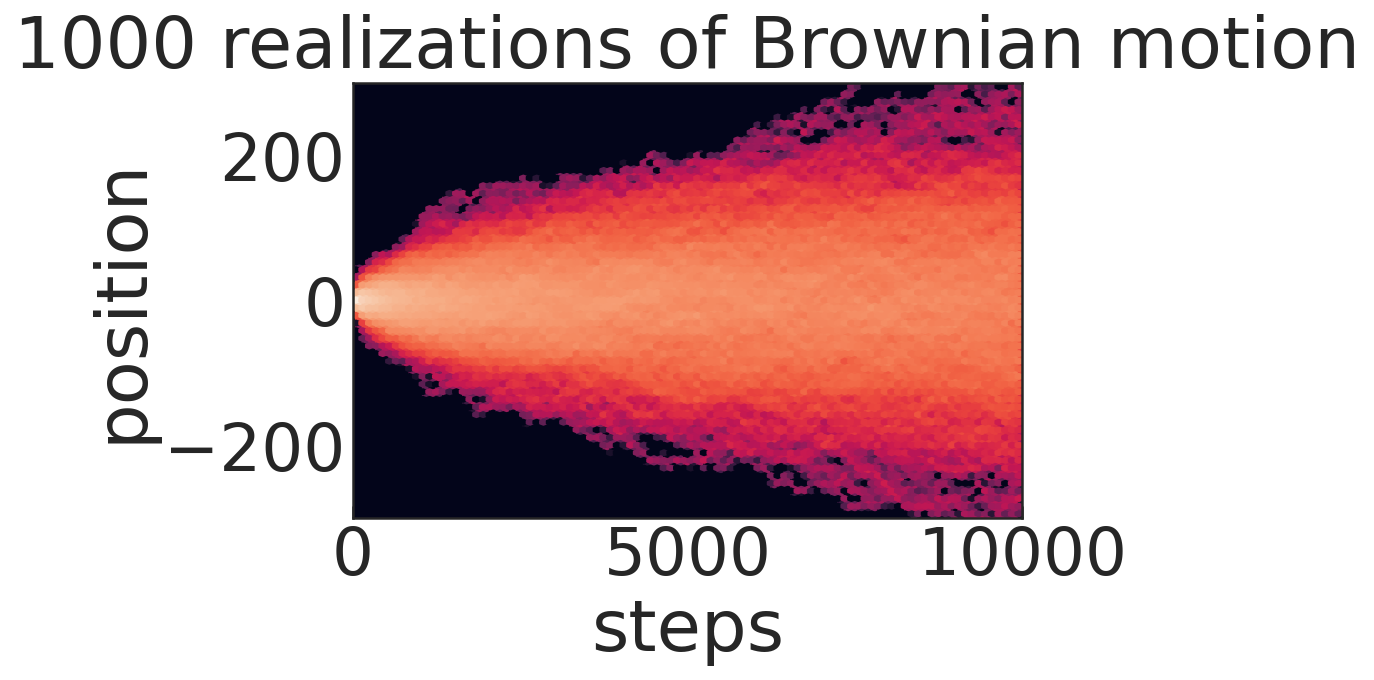

In [6]:
extent = [0,10_000,-300,300]

plt.hexbin(steps,brownian_motion, bins='log', extent=extent)
plt.xlim(extent[0:2])
plt.ylim(extent[2:])

plt.title('1000 realizations of Brownian motion')
plt.ylabel('position')
plt.xlabel('steps')

In [7]:
x = np.arange(white_noise.shape[1])

Text(0.5, 0, 'steps')

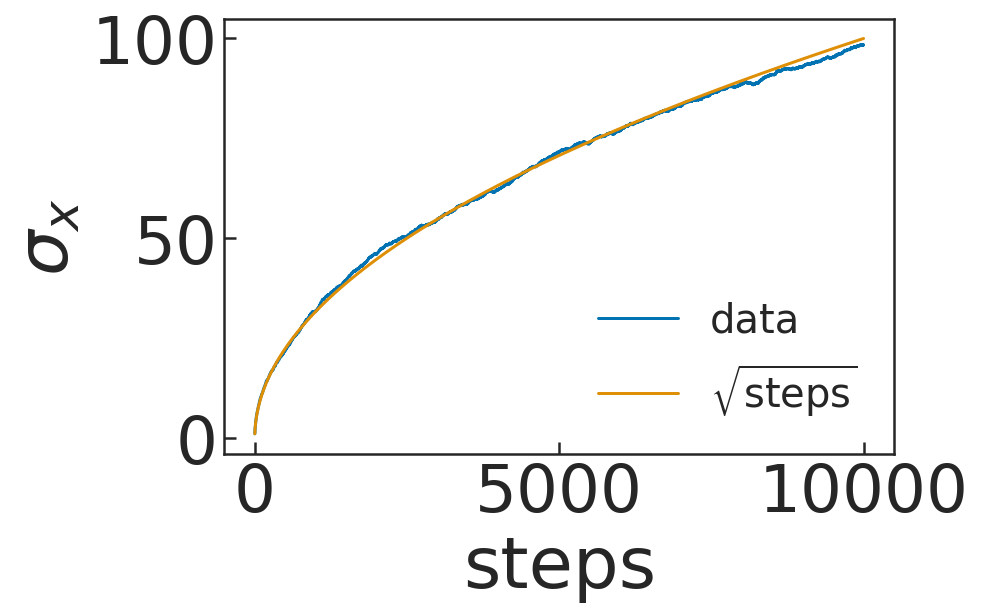

In [8]:
plt.plot(x, brownian_motion.std(axis=0), label='data')
plt.plot(x, np.sqrt(x+1), label=r'$\sqrt{\rm steps}$')

plt.legend(frameon=False, fontsize=20)

plt.ylabel(r'$\sigma_x$')
plt.xlabel('steps')

The diffusion goes as the sqrt of the number of steps. Something that was already worked out by Einstein in his work on Brownian motion: [see Wikipedia](https://en.wikipedia.org/wiki/Brownian_motion).

Using this, we can figure out what the expected diffusion is for Brownian motion.

In [9]:
sigma = 1 # white noise
sigmas = sigma * np.sqrt(steps+1);

In [10]:
x = (np.ones_like(sigmas).T * np.linspace(-300,300,1000)).T

In [14]:
gaussians = 1/np.sqrt(2*pi*sigmas**2) * np.exp(-0.5 * (x/sigmas)**2)

<ipython-input-15-3b2900e80a67>:4: RuntimeWarning: divide by zero encountered in log10
  cim = plt.imshow(np.log10(gaussians), aspect='auto', vmax=-0.3, vmin=-10, extent=extent)


Text(0.5, 0, 'steps')

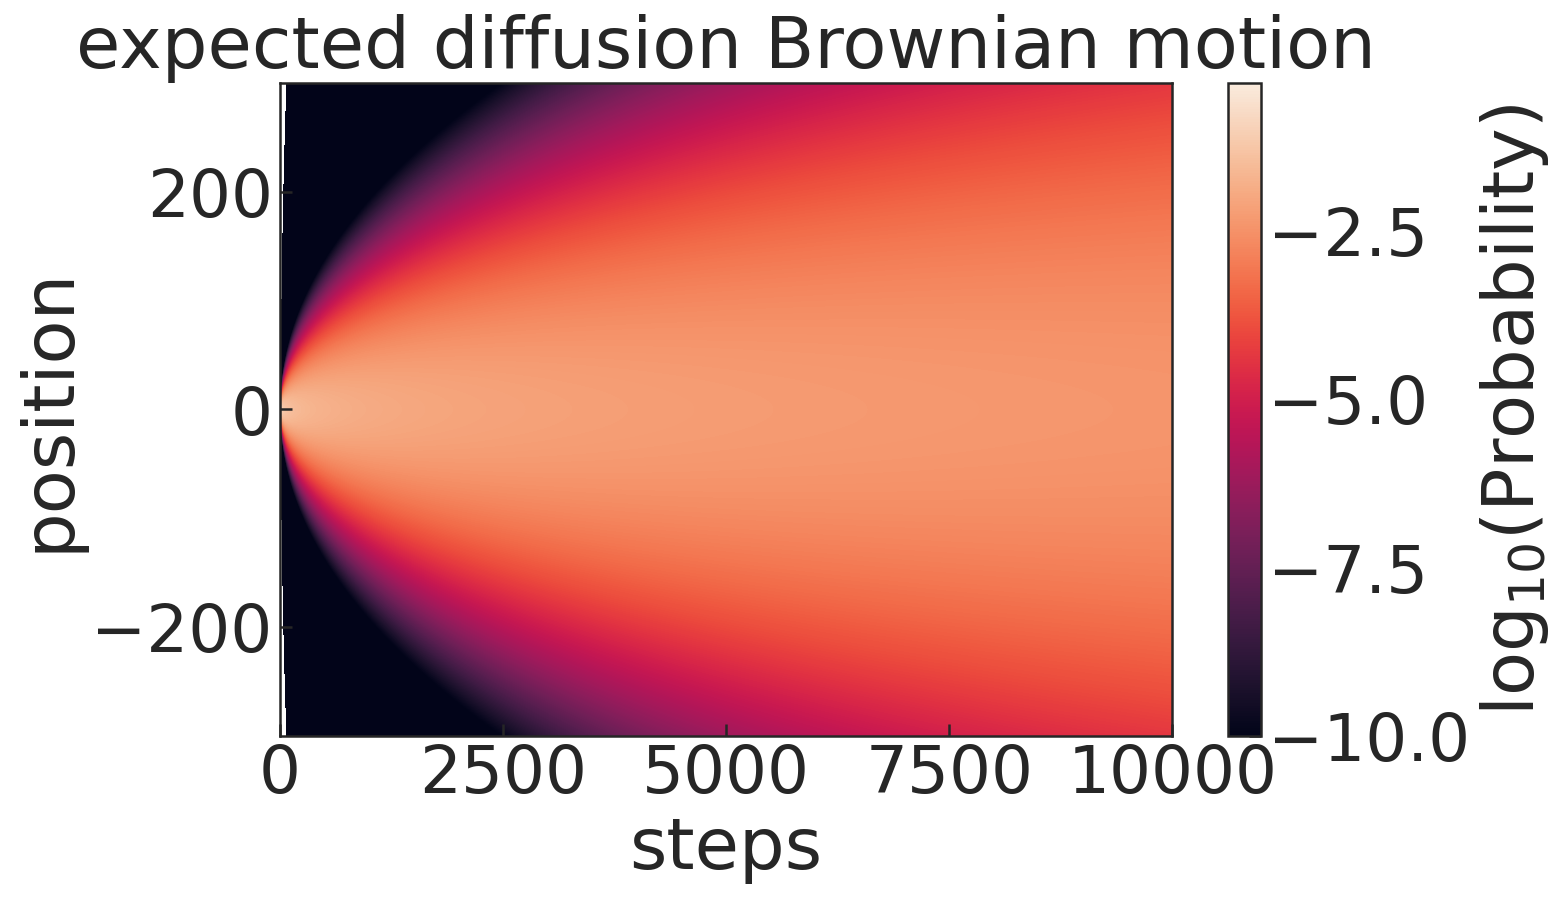

In [15]:
extent = [0,10_000,-300,300]

plt.figure(figsize=(10,6))
cim = plt.imshow(np.log10(gaussians), aspect='auto', vmax=-0.3, vmin=-10, extent=extent)
plt.colorbar(cim, label=r'$\log_{10}$(Probability)')
plt.xlim(extent[0:2])
plt.ylim(extent[2:])

plt.title('expected diffusion Brownian motion')
plt.ylabel('position')
plt.xlabel('steps')